In [1]:
import pandas as pd
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('IMDB Dataset.csv')

In [4]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [5]:
df.shape

(50000, 2)

In [7]:
df.columns

Index(['review', 'sentiment'], dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


---

# NULL Values

In [9]:
pd.isnull(df["sentiment"]).value_counts() 

sentiment
False    50000
Name: count, dtype: int64

In [10]:
df.isnull().sum()

review       0
sentiment    0
dtype: int64

In [11]:
df.shape

(50000, 2)

In [ ]:
pd.isnull(df["clean_tweet"])

In [69]:
null_values_df = df[df["clean_tweet"].isnull()]

In [85]:
null_values_df.count()

clean_tweet      0
sentiment      484
dtype: int64

Removed Null values

---

# Class imbalance

In [42]:
class_count=pd.DataFrame(df.sentiment.value_counts())
class_count.reset_index(inplace=True)

In [43]:
class_count

,sentiment,count
0,positive,25000
1,negative,25000


In [44]:
class_count.columns = ['sentiment', 'count']

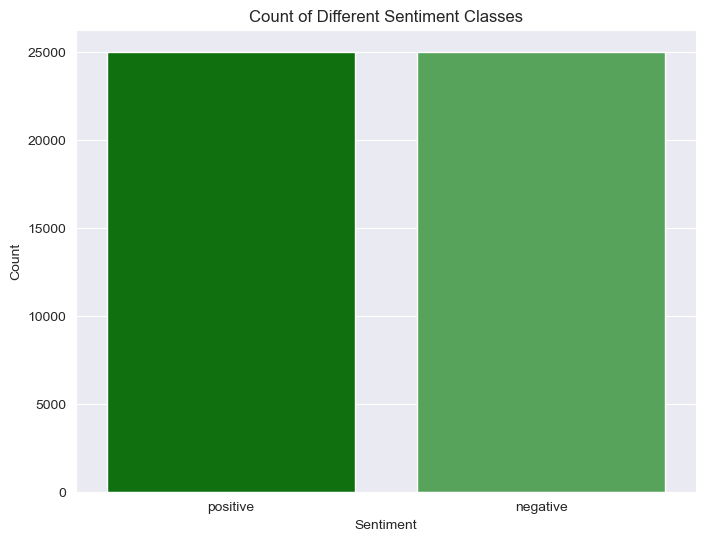

In [47]:
# Define custom colors
light_green = '#008000'
dark_green =  '#4CAF50'
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='sentiment', order=class_count['sentiment'],palette=[light_green, dark_green])
plt.title('Count of Different Sentiment Classes')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

The dataset exhibits minimal class imbalance.

In [96]:
data.head()

,clean_tweet,sentiment
0,call leader help protect refuge covid19 provid...,pos
1,ogun state support cbn nirsal covid19 target c...,pos
2,polic offici base namahadi polic station busi ...,pos
3,covid19 oyo discharg two patient,neu
4,condol famili surviv,neu


___

# TEXT PREPROCESSING - lower,spellcheck,stop word,lemmatisation

In [7]:
import pandas as pd
import neattext.functions as nfx


In [8]:
df.shape

(50000, 2)

In [9]:
data = df

In [10]:
# Lowercasing text, handling NaN values
data['review'] = data['review'].apply(lambda x: x.lower() if isinstance(x, str) else x)

# Remove Punctuations
data['review'] = data['review'].apply(lambda x: nfx.remove_punctuations(x) if isinstance(x, str) else x)

# Remove Stopwords
data['review'] = data['review'].apply(lambda x: nfx.remove_stopwords(x) if isinstance(x, str) else x)

# Remove Special Characters
data['review'] = data['review'].apply(lambda x: nfx.remove_special_characters(x) if isinstance(x, str) else x)

# Lemmatization (optional)
# data['review'] = data['review'].apply(lambda x: nfx.lemmatize(x) if isinstance(x, str) else x)

# Tokenization (optional)
# data['review'] = data['review'].apply(lambda x: nfx.word_tokenize(x) if isinstance(x, str) else x)


In [12]:
# Print first few rows to verify the changes
print(data['review'].head())


0    reviewers mentioned watching 1 oz episode youl...
1    wonderful little production br br the filming ...
2    thought wonderful way spend time hot summer we...
3    basically theres family little boy jake thinks...
4    petter matteis love time money visually stunni...
Name: review, dtype: object


In [21]:
data.isnull().sum()

review       0
sentiment    0
dtype: int64

___

# WORD CLOUD

In [26]:
positive_tweets = data[data['sentiment'] == 'positive']['review']



In [32]:
negative_tweets = data[data['sentiment'] == 'negative']['review']

In [33]:
positive_tweets

0        reviewers mentioned watching 1 oz episode youl...
1        wonderful little production br br the filming ...
2        thought wonderful way spend time hot summer we...
4        petter matteis love time money visually stunni...
5        probably alltime favorite movie story selfless...
                               ...                        
49983    loved fan original series wondered story didnt...
49985    imaginary heroes clearly best film year comple...
49989    got weeks ago love modern light filled true co...
49992    john garfield plays marine blinded grenade fig...
49995    thought movie right good job wasnt creative or...
Name: review, Length: 25000, dtype: object

In [34]:
negative_tweets

3        basically theres family little boy jake thinks...
7        amazing fresh innovative idea 70s aired 7 8 ye...
8        encouraged positive comments film looking forw...
10       phil alien quirky films humour based oddness a...
11       saw movie 12 came recall scariest scene big bi...
                               ...                        
49994    typical junk comedybr br there laughs genuine ...
49996    bad plot bad dialogue bad acting idiotic direc...
49997    catholic taught parochial elementary schools n...
49998    im going disagree previous comment maltin seco...
49999    expects star trek movies high art fans expect ...
Name: review, Length: 25000, dtype: object

In [35]:
data.head()

,review,sentiment
0,reviewers mentioned watching 1 oz episode youl...,positive
1,wonderful little production br br the filming ...,positive
2,thought wonderful way spend time hot summer we...,positive
3,basically theres family little boy jake thinks...,negative
4,petter matteis love time money visually stunni...,positive


In [36]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [37]:
def generate_wordcloud(tweets, title,colo):
    wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110, background_color='white',colormap=colo).generate(' '.join(tweets))
    plt.figure(figsize=(10, 7))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.title(title)
    plt.axis('off')
    plt.show()

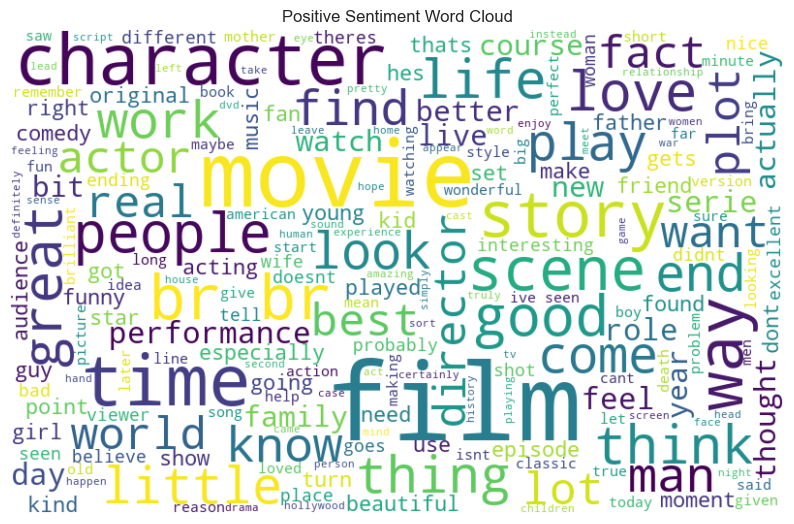

In [38]:
# Generate word cloud for positive sentiment
generate_wordcloud(positive_tweets, "Positive Sentiment Word Cloud",'viridis')

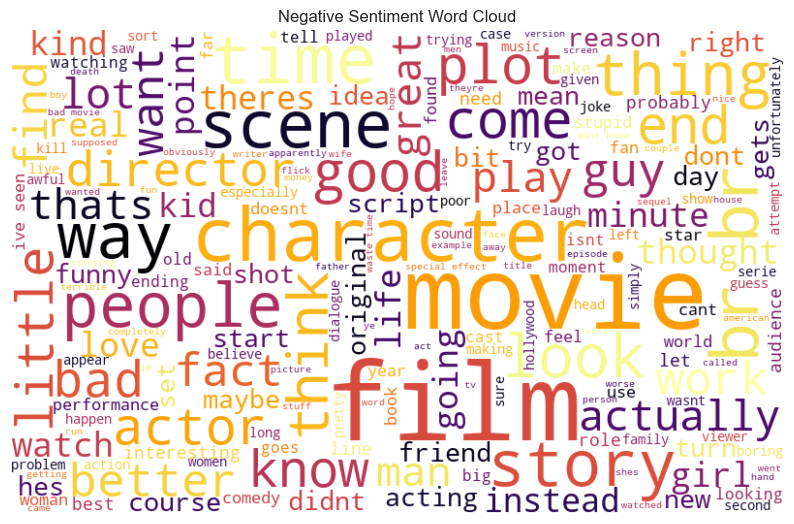

In [39]:
# Generate word cloud for negative sentiment
generate_wordcloud(negative_tweets, "Negative Sentiment Word Cloud",'inferno_r')

---

# ENCODING -Neutal,positive

In [13]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit label encoder and transform sentiment column
data['sentiment_encoded'] = label_encoder.fit_transform(data['sentiment'])

#neg =0  ,pos = 1

In [14]:
data.isnull().sum()

review               0
sentiment            0
sentiment_encoded    0
dtype: int64

In [15]:
data.head(20)

,review,sentiment,sentiment_encoded
0,reviewers mentioned watching 1 oz episode youl...,positive,1
1,wonderful little production br br the filming ...,positive,1
2,thought wonderful way spend time hot summer we...,positive,1
3,basically theres family little boy jake thinks...,negative,0
4,petter matteis love time money visually stunni...,positive,1
5,probably alltime favorite movie story selfless...,positive,1
6,sure like resurrection dated seahunt series te...,positive,1
7,amazing fresh innovative idea 70s aired 7 8 ye...,negative,0
8,encouraged positive comments film looking forw...,negative,0
9,like original gut wrenching laughter like movi...,positive,1


In [16]:
data.columns

Index(['review', 'sentiment', 'sentiment_encoded'], dtype='object')

In [17]:
df_final = data[['review', 'sentiment_encoded']]


In [18]:
df_final

,review,sentiment_encoded
0,reviewers mentioned watching 1 oz episode youl...,1
1,wonderful little production br br the filming ...,1
2,thought wonderful way spend time hot summer we...,1
3,basically theres family little boy jake thinks...,0
4,petter matteis love time money visually stunni...,1
...,...,...
49995,thought movie right good job wasnt creative or...,1
49996,bad plot bad dialogue bad acting idiotic direc...,0
49997,catholic taught parochial elementary schools n...,0
49998,im going disagree previous comment maltin seco...,0


In [19]:
df_final.rename(columns={'sentiment_encoded':'sentiment'},inplace=True)

In [20]:
df_final.head()

,review,sentiment
0,reviewers mentioned watching 1 oz episode youl...,1
1,wonderful little production br br the filming ...,1
2,thought wonderful way spend time hot summer we...,1
3,basically theres family little boy jake thinks...,0
4,petter matteis love time money visually stunni...,1


In [21]:
df_final.isnull().sum()

review       0
sentiment    0
dtype: int64

In [22]:

df_final.to_csv('neattxt.csv', index=False)


---

# MODEL - Train ,test ,predict,accuracy

In [60]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

In [61]:
df_final = data


In [33]:
df_final

,review,sentiment
0,reviewers mentioned watching 1 oz episode youl...,1
1,wonderful little production br br the filming ...,1
2,thought wonderful way spend time hot summer we...,1
3,basically theres family little boy jake thinks...,0
4,petter matteis love time money visually stunni...,1
...,...,...
49995,thought movie right good job wasnt creative or...,1
49996,bad plot bad dialogue bad acting idiotic direc...,0
49997,catholic taught parochial elementary schools n...,0
49998,im going disagree previous comment maltin seco...,0


In [62]:
# Split the data into features (X) and target (y)
X = df_final['review']
y = df_final['sentiment']


In [63]:
df_final.isna().sum()

review               0
sentiment            0
sentiment_encoded    0
dtype: int64

In [64]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [65]:
X_train.isnull().sum()

0

In [66]:
# Initialize SVM classifier
svm_classifier = SVC(kernel='linear', C=1.0, random_state=42)


In [67]:
from sklearn.feature_extraction.text import TfidfVectorizer

# TF-IDF vectorization
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [40]:
# Initialize SVM classifier
svm_classifier = SVC(kernel='linear', C=1.0, random_state=42)


In [ ]:
# Predict the sentiment for the test set
y_pred = svm_classifier.predict(X_test_tfidf)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

#Display the results
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Generate classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

In [ ]:

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


---

# LOG REG

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [26]:
from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report, accuracy_score

In [27]:
# Split the data into features (X) and target (y)
X = df_final['review']
y = df_final['sentiment']

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
tfidf_vectorizer = TfidfVectorizer(max_features=10000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)


In [32]:
model = LogisticRegression()
model.fit(X_train_tfidf, y_train)


LogisticRegression()

In [33]:
y_pred = model.predict(X_test_tfidf)

# Calculate accuracy
accuracy1 = accuracy_score(y_test, y_pred)

In [34]:
accuracy1

0.8945

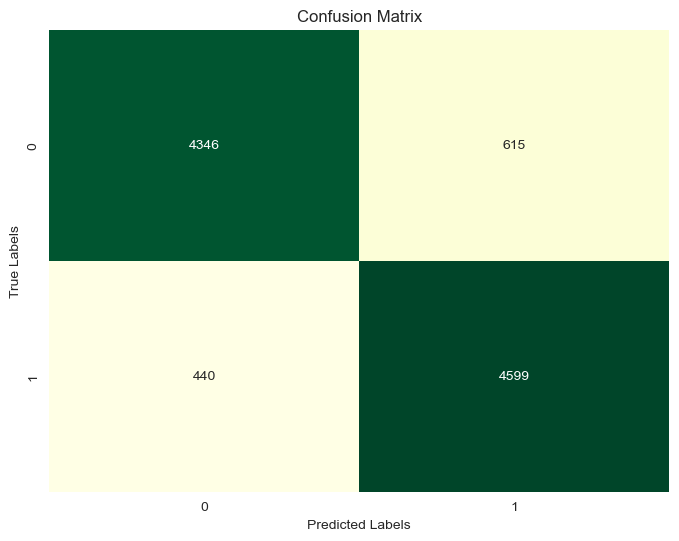

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.88      0.89      4961
           1       0.88      0.91      0.90      5039

    accuracy                           0.89     10000
   macro avg       0.90      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



In [39]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="YlGn", cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Generate classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)


In [37]:
get_colormap(name)

NameError: name 'get_colormap' is not defined

---

# SVM

In [68]:
svm_classifier = SVC(kernel='linear', C=1.0, random_state=42)

In [ ]:
svm_classifier.fit(X_train_tfidf, y_train)

In [ ]:
y_pred = svm_classifier.predict(X_test_tfidf)

# Prediction New values

In [ ]:
new_sentence = input("Enter a sentence: ")

In [ ]:
new_sentence_features = tfidf_vectorizer.transform([preprocessed_sentence])

In [ ]:
y_pred = svm_classifier.predict(new_sentence_features)